## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
import tensorflow as tf
import keras as keras
import numpy as np


In [0]:

from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [97]:
print("Shape x_train :" ,x_train.shape)
print("Shape y_train :" ,y_train.shape)

Shape x_train : (60000, 28, 28)
Shape y_train : (60000,)


In [98]:
print("Shape x_test :" ,x_test.shape)
print("Shape y_test :" ,y_test.shape)

Shape x_test : (10000, 28, 28)
Shape y_test : (10000,)


### Find dimensions of an image in the dataset

In [99]:
print("Shape of first object in x_train :",x_train[0].shape)

Shape of first object in x_train : (28, 28)


### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
class_len = len(np.unique(y_train))
testY = keras.utils.to_categorical(y_test,
    num_classes=None,
    dtype='float32')
trainY = keras.utils.to_categorical(y_train,
    num_classes=None,
    dtype='float32')

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
train_x = np.array(x_train).astype('float32') / 255.0
test_x = np.array(x_test).astype('float32') / 255.0
# train_y = np.array(y_train).astype('float32') / 255.0
# test_y = np.array(y_test).astype('float32') /255.0

In [29]:
test_x.shape

(10000, 28, 28)

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
# train_x = tf.keras.preprocessing.image.img_to_array(train_x)
# test_x = tf.keras.preprocessing.image.img_to_array(test_x)
train_x = train_x.reshape(60000,28,28,1)
test_x = test_x.reshape(10000,28,28,1)

### Import the necessary layers from keras to build the model

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [0]:
#Initialize model, reshape & normalize data
model = tf.keras.models.Sequential()
img_size = 32

#Add Layers
# model.add(tf.keras.layers.BatchNormalization(input_shape=(img_size,img_size,3)))
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.Conv2D(34, kernel_size=(3,3), activation='relu'))
# model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
# model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

   

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [0]:
patience=5
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_acc',
        patience=patience,
        mode='max',
        verbose=1)
]

In [105]:
model.fit(train_x,trainY, epochs=10,callbacks = callbacks)


Epoch 1/10
59840/60000 [============================>.] - ETA: 0s - loss: 0.3739 - acc: 0.8658

W0818 10:45:27.304798 140599988692864 callbacks.py:1259] Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,acc


60000/60000 [==============================] - 8s 131us/sample - loss: 0.3735 - acc: 0.8659
Epoch 2/10
59616/60000 [============================>.] - ETA: 0s - loss: 0.2321 - acc: 0.9141

W0818 10:45:34.837731 140599988692864 callbacks.py:1259] Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,acc


60000/60000 [==============================] - 8s 125us/sample - loss: 0.2320 - acc: 0.9142
Epoch 3/10
59808/60000 [============================>.] - ETA: 0s - loss: 0.1696 - acc: 0.9364

W0818 10:45:42.388593 140599988692864 callbacks.py:1259] Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,acc


60000/60000 [==============================] - 8s 126us/sample - loss: 0.1695 - acc: 0.9365
Epoch 4/10
59808/60000 [============================>.] - ETA: 0s - loss: 0.1185 - acc: 0.9559

W0818 10:45:49.909712 140599988692864 callbacks.py:1259] Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,acc


60000/60000 [==============================] - 8s 125us/sample - loss: 0.1184 - acc: 0.9559
Epoch 5/10
59616/60000 [============================>.] - ETA: 0s - loss: 0.0799 - acc: 0.9700

W0818 10:45:57.466903 140599988692864 callbacks.py:1259] Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,acc


60000/60000 [==============================] - 8s 126us/sample - loss: 0.0800 - acc: 0.9700
Epoch 6/10
59616/60000 [============================>.] - ETA: 0s - loss: 0.0531 - acc: 0.9814

W0818 10:46:05.214962 140599988692864 callbacks.py:1259] Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,acc


60000/60000 [==============================] - 8s 129us/sample - loss: 0.0531 - acc: 0.9814
Epoch 7/10
59872/60000 [============================>.] - ETA: 0s - loss: 0.0372 - acc: 0.9865

W0818 10:46:12.783426 140599988692864 callbacks.py:1259] Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,acc


60000/60000 [==============================] - 8s 126us/sample - loss: 0.0372 - acc: 0.9865
Epoch 8/10
59616/60000 [============================>.] - ETA: 0s - loss: 0.0279 - acc: 0.9901

W0818 10:46:20.262669 140599988692864 callbacks.py:1259] Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,acc


60000/60000 [==============================] - 7s 125us/sample - loss: 0.0278 - acc: 0.9901
Epoch 9/10
59936/60000 [============================>.] - ETA: 0s - loss: 0.0226 - acc: 0.9920

W0818 10:46:27.751979 140599988692864 callbacks.py:1259] Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,acc


60000/60000 [==============================] - 7s 125us/sample - loss: 0.0226 - acc: 0.9920
Epoch 10/10
59648/60000 [============================>.] - ETA: 0s - loss: 0.0183 - acc: 0.9935

W0818 10:46:35.222586 140599988692864 callbacks.py:1259] Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,acc


60000/60000 [==============================] - 7s 124us/sample - loss: 0.0183 - acc: 0.9935


### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True,
                                                               width_shift_range=0.2,
                                                               height_shift_range=0.2,
                                                               rotation_range=30,
                                                               shear_range=0.2,
                                                               zoom_range=0.3)

In [107]:
transformed_image = tf.keras.preprocessing.image.array_to_img(train_x[0])
transformed_image


#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

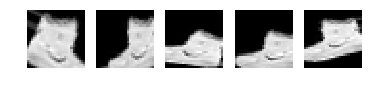

In [108]:
from matplotlib import pyplot as plt
gen = datagen.flow(train_x[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [110]:
# model.fit(train_x,trainY, epochs=10,callbacks = callbacks)
test_gen = datagen.flow(train_x, trainY, batch_size = 100)
model.fit_generator(test_gen, epochs=10, callbacks = callbacks)

Epoch 1/10
597/600 [============================>.] - ETA: 0s - loss: 1.1923 - acc: 0.5742

W0818 10:48:07.563629 140599988692864 callbacks.py:1259] Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,acc


600/600 [==============================] - 14s 23ms/step - loss: 1.1910 - acc: 0.5746
Epoch 2/10
598/600 [============================>.] - ETA: 0s - loss: 0.8535 - acc: 0.6818

W0818 10:48:21.650190 140599988692864 callbacks.py:1259] Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,acc


600/600 [==============================] - 14s 23ms/step - loss: 0.8531 - acc: 0.6820
Epoch 3/10
598/600 [============================>.] - ETA: 0s - loss: 0.7749 - acc: 0.7092

W0818 10:48:35.879963 140599988692864 callbacks.py:1259] Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,acc


600/600 [==============================] - 14s 24ms/step - loss: 0.7746 - acc: 0.7093
Epoch 4/10
599/600 [============================>.] - ETA: 0s - loss: 0.7274 - acc: 0.7279

W0818 10:48:50.177482 140599988692864 callbacks.py:1259] Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,acc


600/600 [==============================] - 14s 24ms/step - loss: 0.7275 - acc: 0.7278
Epoch 5/10
598/600 [============================>.] - ETA: 0s - loss: 0.6832 - acc: 0.7437

W0818 10:49:04.264320 140599988692864 callbacks.py:1259] Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,acc


600/600 [==============================] - 14s 23ms/step - loss: 0.6833 - acc: 0.7436
Epoch 6/10
599/600 [============================>.] - ETA: 0s - loss: 0.6505 - acc: 0.7584

W0818 10:49:18.354342 140599988692864 callbacks.py:1259] Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,acc


600/600 [==============================] - 14s 23ms/step - loss: 0.6505 - acc: 0.7584
Epoch 7/10
597/600 [============================>.] - ETA: 0s - loss: 0.6233 - acc: 0.7685

W0818 10:49:32.507733 140599988692864 callbacks.py:1259] Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,acc


600/600 [==============================] - 14s 24ms/step - loss: 0.6236 - acc: 0.7683
Epoch 8/10
599/600 [============================>.] - ETA: 0s - loss: 0.6017 - acc: 0.7760

W0818 10:49:46.596671 140599988692864 callbacks.py:1259] Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,acc


600/600 [==============================] - 14s 23ms/step - loss: 0.6014 - acc: 0.7761
Epoch 9/10
598/600 [============================>.] - ETA: 0s - loss: 0.5902 - acc: 0.7811

W0818 10:50:00.715591 140599988692864 callbacks.py:1259] Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,acc


600/600 [==============================] - 14s 24ms/step - loss: 0.5898 - acc: 0.7812
Epoch 10/10
599/600 [============================>.] - ETA: 0s - loss: 0.5688 - acc: 0.7898

W0818 10:50:14.797834 140599988692864 callbacks.py:1259] Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,acc


600/600 [==============================] - 14s 23ms/step - loss: 0.5691 - acc: 0.7896


###  Report the final train and validation accuracy

In [142]:
print("The Max accuracy got for model with fit_generator() is 0.7896")

The Max accuracy got for model with fit_generator() is 0.7896


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from keras.datasets import cifar10

### **Load CIFAR10 dataset**

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator( rotation_range=90,
                 width_shift_range=0.1, height_shift_range=0.1,
                 horizontal_flip=True)


In [113]:
x_train.shape

(60000, 28, 28)

### **Prepare/fit the generator.**

In [0]:
# x_train = np.array(x_train).astype('float32') / 255.0
# x_train = train_x.reshape(60000,28,28,1)

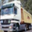

In [138]:
tf.keras.preprocessing.image.array_to_img(x_train[1])

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

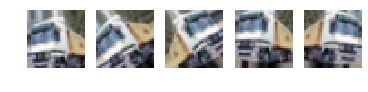

In [140]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[1:2], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().astype(np.uint8).squeeze())
    plt.plot()
plt.show()